**TASK-5 : SALES PREDICTION USING PYTHON**

---



-> Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

#**REQUIRED MODULES**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#**Importing Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/oasis/datasetsoasis/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#**EDA**

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
# AS WE CAN SEE, THE FIRST COLUMN IS JUST ROW NUMBER, WHICH WE DONT NEED. SO DROPPING IT.
df.drop(df.iloc[:,0:1],axis=1,inplace=True)

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()
# HENCE WE CAN SEE THERE IS NO NULL VALUES.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**contribution in sales**

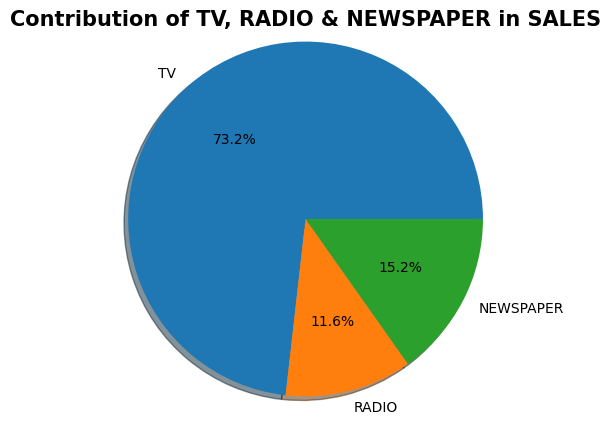

In [ ]:
a=df['TV'].sum()
b=df['Radio'].sum()
c=df['Newspaper'].sum()
x=[a,b,c]
label=["TV","RADIO","NEWSPAPER"]

plt.pie(x,radius=1.2,labels=label,shadow=True,autopct= '%0.1f%%')

plt.title("Contribution of TV, RADIO & NEWSPAPER in SALES",fontweight='bold',fontsize=15)

plt.show()

**Regression Plot**

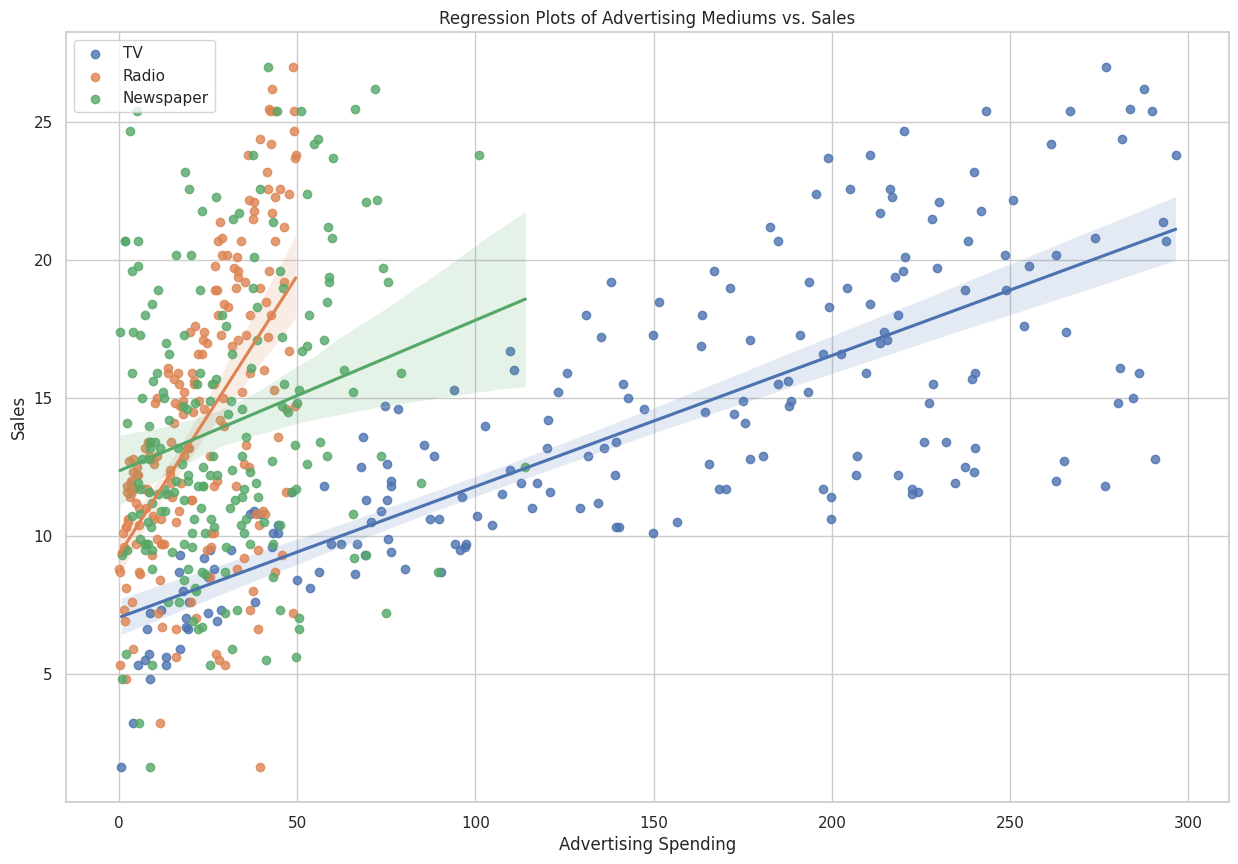

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

sns.regplot(x='TV', y='Sales', data=df,label='TV')
sns.regplot(x='Radio', y='Sales', data=df,label='Radio')
sns.regplot(x='Newspaper', y='Sales', data=df,label='Newspaper')
plt.legend(loc='upper left')
plt.title('Regression Plots of Advertising Mediums vs. Sales')
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')

plt.show()

**DISTRIBUTION**

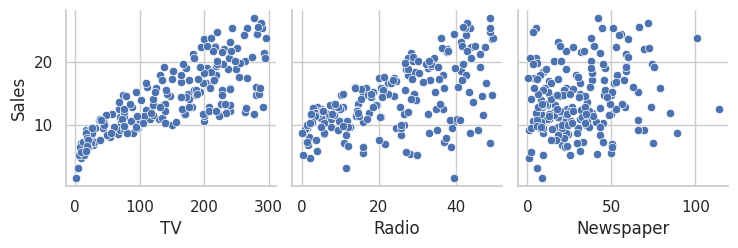

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales', kind='scatter')
plt.show()

**CORRELATION**

<Axes: >

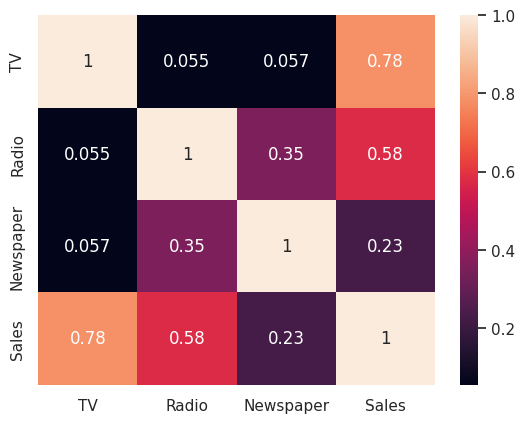

In [ ]:
correlation=df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

#**Creating Logistic Regression model**



**Splitting the data set into training and testing**

In [ ]:
X = df.drop(['Sales'],axis = 1)
y = df.Sales

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train # 80% of our data from 3 columns is allocated to train the model

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
y_test # 20% of our data is aloocated to test the model

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

Checking Root Mean Squared Error(RMS) of the training data:

In [ ]:
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

Checking Root Mean Squared Error of test data:

In [ ]:
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print("Training set:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R^2: {train_r2:.2f}")

Training set:
RMSE: 1.64
R^2: 0.90


In [ ]:
print("\nTesting set:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R^2: {test_r2:.2f}")


Testing set:
RMSE: 1.78
R^2: 0.90


#**Testing on custom Data :**

In [ ]:
new_data = pd.DataFrame({'TV': [230.1], 'Radio': [37.8], 'Newspaper': [69.2]})
predicted_sales = model.predict(new_data)
print(f"\nPredicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 20.61


In [ ]:
#Now for more accurate and logical model formation we will import cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
cv = 5
CV = []

def model(algorithm,x_train,y_target,x_test,y_target_test):
    algorithm.fit(x_train,y_target)
    predicts=algorithm.predict(x_test)
    prediction=pd.DataFrame(predicts)
    cross_val=cross_val_score(algorithm,x_train,y_target,cv=cv)

    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())

     # Plot for prediction vs originals
    test_index=y_target_test.reset_index()["Sales"]
    ax=test_index.plot(label="Original",figsize=(15,8),linewidth=2,color="r")
    ax=prediction[0].plot(label = "Prediction",figsize=(15,8),linewidth=2,color="g")
    plt.legend()
    plt.title("Original VS Prediction",fontsize=15,fontweight='bold')
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.show()

CV scores: [0.71981527 0.92992247 0.92652848 0.91883369 0.80234225] 

CV scores mean: 0.8594884313276513


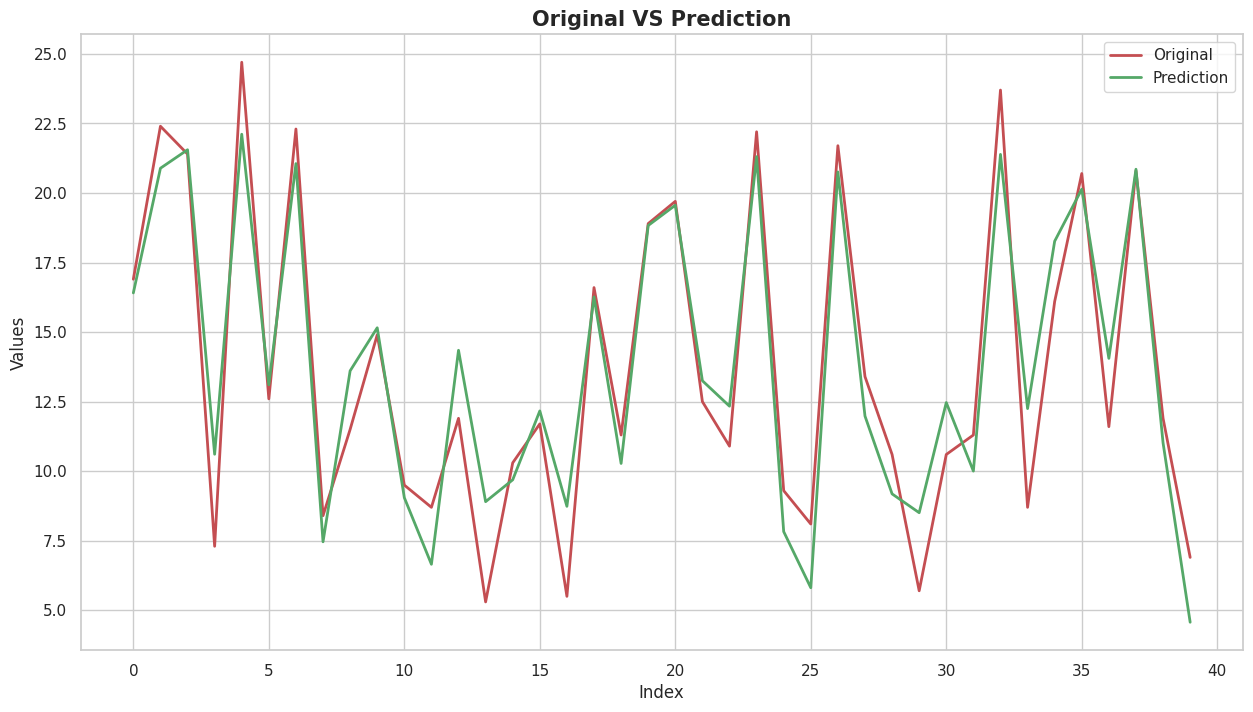

In [ ]:
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

#**CONCLUSION**

**As The Model Is Giving The Output ALMOST Correctly, It Is Clearly Seen That The Model Is Working Fine**

conclusion, the developed sales prediction algorithm has demonstrated its effectiveness by consistently generating outputs that closely align with the actual sales figures. The algorithm's performance showcases its ability to capture and leverage underlying patterns and trends within the data. Its predictions, which closely resemble the actual outcomes, underscore its potential to provide valuable insights for decision-making processes.

The algorithm's accuracy in approximating sales figures highlights its potential applicability in real-world scenarios. This achievement not only validates the algorithm's design and implementation but also suggests that it could serve as a reliable tool for forecasting sales trends and aiding in strategic planning.

However, while the algorithm's performance on the current data is promising, it's important to continue evaluating its performance on new, unseen data. Rigorous testing and validation will help confirm its generalization capabilities and ensure its robustness across a range of scenarios. Furthermore, ongoing refinements and optimizations can enhance the algorithm's predictive capabilities even further, paving the way for more accurate and informed business decisions in the future.